# Custom BI Project: Slicing Through Sales: Product Trends by Segment & Region
### The Business Goal: 
To analyze customer spending behavior on May 4, 2025, by product category, customer segment, and region. The goal is to uncover high-performing segments and categories to support future campaign targeting and inventory decisions.

## Step 1: Import Libraries and Load Data


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data files (update paths if needed)
sales_df = pd.read_csv('data/raw/sales_data.csv')
products_df = pd.read_csv('data/raw/products_data.csv')
customers_df = pd.read_csv('data/raw/customers_data.csv')

## Step 2: Rename Columns for Consistency

In [8]:
# Rename columns for consistency
products_df = products_df.rename(columns={
    'ProductID': 'product_id',
    'Category': 'product_category'
})

customers_df = customers_df.rename(columns={
    'CustomerID': 'customer_id',
    'CustomerSegment': 'customer_segment',
    'Region': 'region'
})

sales_df = sales_df.rename(columns={
    'CustomerID': 'customer_id',
    'ProductID': 'product_id',
    'SaleDate': 'sale_date',
    'SaleAmount': 'amount'
})

# Convert sale_date to datetime (coerce errors to NaT)
sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'], errors='coerce')

# Filter sales for May 4, 2025
may4_sales = sales_df[sales_df['sale_date'].dt.date == pd.to_datetime('2025-05-04').date()]

print(f"Sales records on 2025-05-04: {len(may4_sales)}")

Sales records on 2025-05-04: 2000


## Step 3: Merge sales data with product and customer information

In [9]:
# Merge sales with product and customer info
merged_df = may4_sales.merge(
    products_df[['product_id', 'product_category']],
    on='product_id',
    how='left'
).merge(
    customers_df[['customer_id', 'customer_segment', 'region']],
    on='customer_id',
    how='left'
)

print(f"Merged dataframe shape: {merged_df.shape}")
print(merged_df.head())

Merged dataframe shape: (2022, 12)
   TransactionID  sale_date  customer_id  product_id  StoreID  CampaignID  \
0              1 2025-05-04         1034        2059      402         0.0   
1              2 2025-05-04         1066        2048      403         1.0   
2              3 2025-05-04         1116        2041      403         3.0   
3              4 2025-05-04         1071        2096      404         2.0   
4              5 2025-05-04         1020        2060      401         0.0   

    amount  DiscountPercent   PaymentType product_category customer_segment  \
0   2048.2             10.0    CreditCard             Home          Regular   
1   321.87              0.0        PayPal             Home        Wholesale   
2  3216.84              5.5          Cash           Office        Wholesale   
3  1613.23             20.0  BankTransfer             Home          Premium   
4   408.38             15.0    CreditCard             Home          Regular   

    region  
0  Central  
1

## Step 4: Visualize Sales by Customer Segment and Product Category using a Heatmap

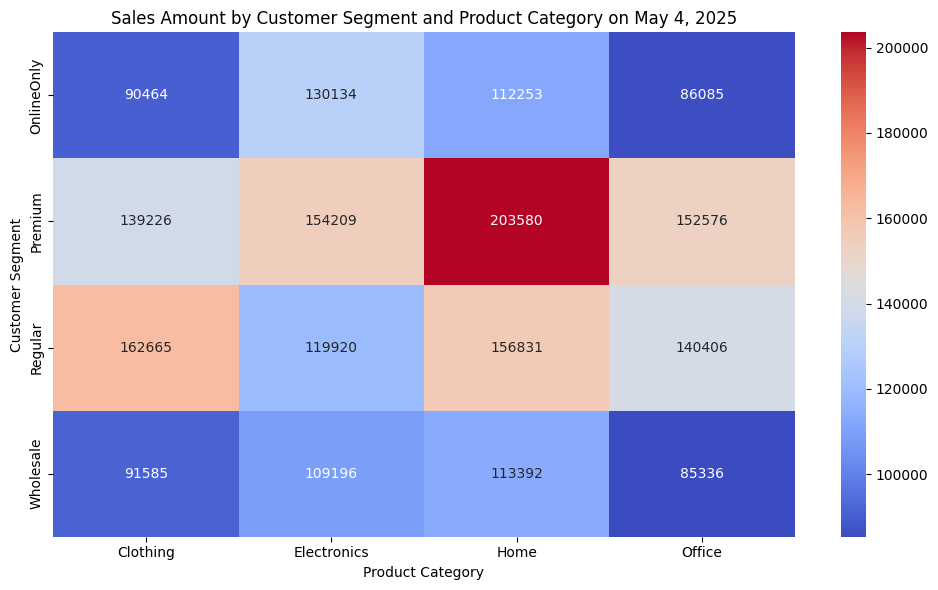

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'amount' is numeric (coerce errors to NaN)
merged_df['amount'] = pd.to_numeric(merged_df['amount'], errors='coerce')

# Group and aggregate total sales amount by customer segment and product category
segment_category_sales = merged_df.groupby(
    ['customer_segment', 'product_category']
)['amount'].sum().reset_index()

# Pivot for heatmap
pivot_segment_category = segment_category_sales.pivot(
    index='customer_segment',
    columns='product_category',
    values='amount'
).fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_segment_category, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Sales Amount by Customer Segment and Product Category on May 4, 2025")
plt.ylabel("Customer Segment")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


## Step 5: Visualize Sales by Region and Product Category using a Heatmap

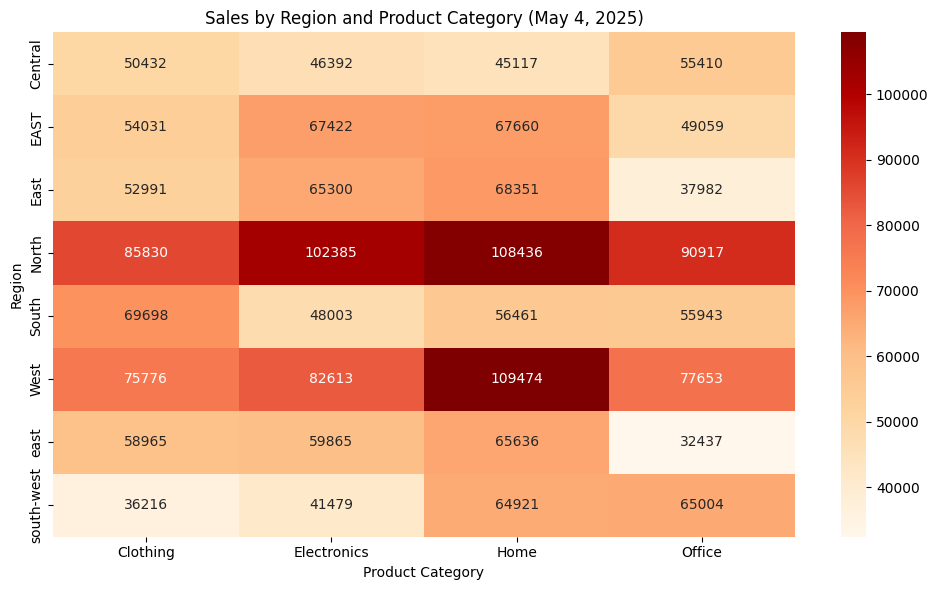

In [11]:
# Group by region and product category
region_category_sales = merged_df.groupby(
    ['region', 'product_category']
)['amount'].sum().reset_index()

# Pivot for heatmap
pivot_region_category = region_category_sales.pivot(
    index='region',
    columns='product_category',
    values='amount'
).fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_region_category, annot=True, fmt=".0f", cmap="OrRd")
plt.title("Sales by Region and Product Category (May 4, 2025)")
plt.ylabel("Region")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()